<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libvis-basic-usage" data-toc-modified-id="Libvis-basic-usage-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libvis basic usage</a></span><ul class="toc-item"><li><span><a href="#Start-the-server" data-toc-modified-id="Start-the-server-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Start the server</a></span></li><li><span><a href="#Visualisation-of-different-objects" data-toc-modified-id="Visualisation-of-different-objects-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualisation of different objects</a></span><ul class="toc-item"><li><span><a href="#Number-->-Number" data-toc-modified-id="Number-->-Number-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Number -&gt; Number</a></span></li><li><span><a href="#List-of-numbers-->-Line-graph" data-toc-modified-id="List-of-numbers-->-Line-graph-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>List of numbers -&gt; Line graph</a></span></li><li><span><a href="#2d-Array-->-Image" data-toc-modified-id="2d-Array-->-Image-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>2d Array -&gt; Image</a></span></li></ul></li><li><span><a href="#Restart-the-server" data-toc-modified-id="Restart-the-server-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Restart the server</a></span></li><li><span><a href="#Live-data-stream" data-toc-modified-id="Live-data-stream-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Live data stream</a></span></li><li><span><a href="#Matplotlib-figures" data-toc-modified-id="Matplotlib-figures-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Matplotlib figures</a></span></li><li><span><a href="#Bokeh-figures" data-toc-modified-id="Bokeh-figures-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Bokeh figures</a></span></li><li><span><a href="#Seaborn:-large-dataset" data-toc-modified-id="Seaborn:-large-dataset-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Seaborn: large dataset</a></span></li><li><span><a href="#Camera-live-stream" data-toc-modified-id="Camera-live-stream-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Camera live stream</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import time

from libvis import Vis
import libvis.modules

%load_ext autoreload
%autoreload 2

## Libvis basic usage


### Start the server


In [2]:
vis = Vis(ws_port=7700, vis_port=7000, allow_remote=True)

Started libvis app at http://0.0.0.0:7000


### Visualisation of different objects
#### Number -> Number


In [3]:
vis.vars.number = 1

#### List of numbers -> Line graph

The idea behind libvis is that any object has a visual representation.
The default representation for a `list` is a line graph.

The 1-d numpy array also will be represented as a line graph


In [4]:
vis.vars.graph = [2, 1, 7, 1, 8, 2, 8]

x = np.linspace(0, 10, 50)
vis.vars.graph_numpy = np.sin(x)

#### 2d Array -> Image


In [5]:
im = np.random.randn(201,120,3)*145
vis.vars.image_canvas = im

In [6]:
from libvis.modules import Image

In [7]:
im = np.random.randn(120,201,3)*.5
vis.vars.image_png = Image(im)

### Restart the server

In [8]:
vis.stop()

Stopping webapp http server: `Vis.stop_http()`... OK
Stopping websocket server: `Vis.app.stop()`... OK


In [9]:
vis.start()

Started libvis app at http://0.0.0.0:7000


### Live data stream

In [10]:
vis.vars.stream = [1]
for i in range(100):
    vis.vars.stream += [np.random.randint(100)]
    time.sleep(.005)

Lissajous curves 

In [11]:
for i in tqdm(range(100)):
    vis.vars.test=np.sin(
        [
         np.linspace(0 +i/10,10+i/10, 40)
        ,np.linspace(10+i/5, 10+i/10, 40)
        ,np.linspace(10+i/5, 5 +i/10, 40)
        ]
    ).tolist()
    time.sleep(0.1)

127.0.0.1 - - [08/Oct/2020 14:51:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Oct/2020 14:51:58] "GET /index.bundle.js?94bf264022802c3c715f HTTP/1.1" 200 -
127.0.0.1 - - [08/Oct/2020 14:51:59] "GET /favicon.ico HTTP/1.1" 200 -


This should plot following in webapp:

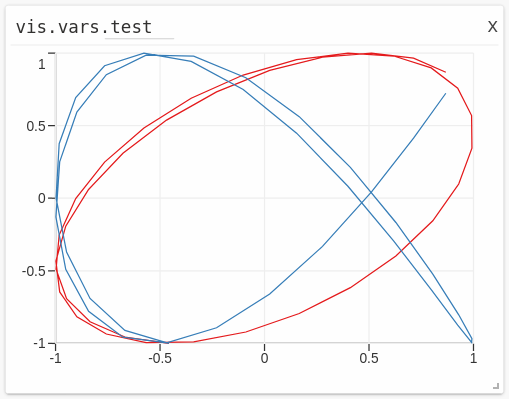

### Matplotlib figures

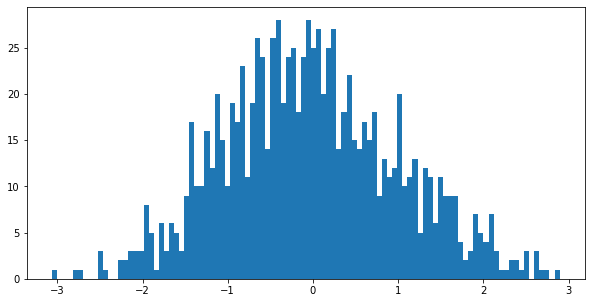

In [91]:
N = np.random.randn(1000)
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(N,bins=100)
vis.vars.image = fig

### Bokeh figures

Bokeh is a better plotting utility that allows scalable interactive plots

In [12]:
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin
from bokeh.embed import file_html
import bokeh

n = 50000
x = np.random.standard_normal(n)
y = np.random.standard_normal(n)

bins = hexbin(x, y, 0.1)

p = figure(title="Manual hex bin for 50000 points", tools="wheel_zoom,pan,reset",
           match_aspect=True,
           sizing_mode='stretch_both',
           plot_width=300, plot_height=300,
           background_fill_color='#440154')
p.grid.visible = False

p.hex_tile(q="q", r="r", size=0.1, line_color=None, source=bins,
           fill_color=linear_cmap('counts', 'Viridis256', 0, max(bins.counts)))
type(p)

vis.vars.bokeh = p

Resulting interactive widget:

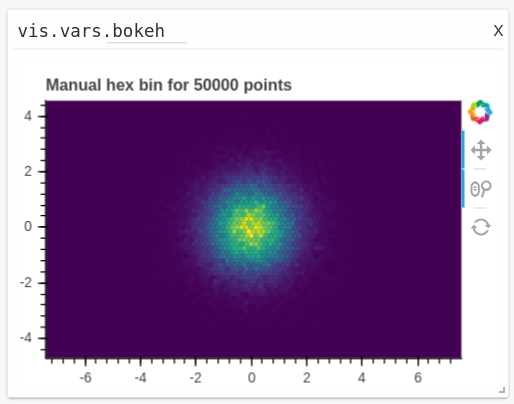

### Seaborn: large dataset

Seaborn is advanced statistical plotting utility based on matplitlib.

The following picture has a 54K datapoints, and it starts to be laggy.

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Load the example iris dataset
diamonds = sns.load_dataset("diamonds")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


/usr/lib/python3.8/site-packages/mpld3-0.3-py3.8.egg/mpld3/mplexporter/exporter.py:267: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]


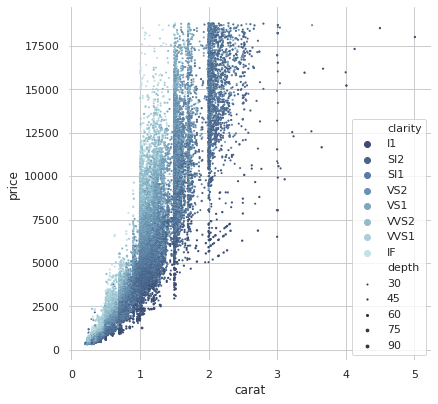

192.168.0.8 - - [08/Oct/2020 05:40:32] "GET / HTTP/1.1" 200 -
192.168.0.8 - - [08/Oct/2020 05:40:33] "GET /index.bundle.js?94bf264022802c3c715f HTTP/1.1" 200 -
192.168.0.8 - - [08/Oct/2020 05:40:34] "GET /favicon.ico HTTP/1.1" 200 -


In [95]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

vis.vars.sns = f

### Camera live stream

In [98]:
import cv2

In [107]:
cap = cv2.VideoCapture(0)
camera_opened = cap.isOpened()
print('Camera opened:', camera_opened)

if camera_opened:
    ret, frame = cap.read()
    if ret:
        print('Camera frame shape:', frame.shape)

Camera opened: True
Camera frame shape: (720, 1280, 3)


In [108]:
for i in range(10):
    
    ret, frame = cap.read()
    if ret:
        vis.vars.image = frame[:320, :480, :]
    
    time.sleep(0.9)

127.0.0.1 - - [08/Oct/2020 05:47:01] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Oct/2020 05:47:01] "GET /index.bundle.js?94bf264022802c3c715f HTTP/1.1" 200 -
127.0.0.1 - - [08/Oct/2020 05:47:01] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [08/Oct/2020 05:47:17] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Oct/2020 05:47:18] "GET /index.bundle.js?94bf264022802c3c715f HTTP/1.1" 200 -
127.0.0.1 - - [08/Oct/2020 05:47:20] "GET /favicon.ico HTTP/1.1" 200 -


In [13]:
# close the camera 
cap.release()

In [ ]:
# Stop the server
vis.stop()

Stopping webapp http server: `Vis.stop_http()`...